In [1]:
# Dataset import
import numpy as np
import pandas as pd

df = pd.read_csv('startup_funding_clean.csv')
df.head()

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type,Amount in USD(K),Amount in INR(K),Remarks,City Tier
0,1,2020-01-09,BYJU\u2019S,E-Tech,E-learning,Bengaluru,Tiger Global Maagemet,Private Equity,200000.00,17600000.00,No Remark,Tier 1 India
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehaa Growth Equity,Series C,8048.39,708258.32,No Remark,Tier 1 India
2,3,2020-01-09,Mamaearth,E-Commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital Idia,Series B,18358.86,1615579.68,No Remark,Tier 1 India
3,4,2020-01-02,https://www.wealthbucket.in/,Fintech,Online Investment,New Delhi,Viod Khatumal,Pre-Series A,3000.00,264000.00,No Remark,Tier 1 India
4,5,2020-01-02,Fashor,Fashion And Apparel,Embroiled Clothes For Women,Mumbai,Sprout Veture Parters,Seed Funding,1800.00,158400.00,No Remark,Tier 1 India


In [2]:
# Basic structure and statistics
df.info()
df.describe(include='all')

# Count of unique startups, cities, industries
print("Unique Startups:", df['Startup Name'].nunique())
print("Unique Cities:", df['City Location'].nunique())
print("Unique Industries:", df['Industry Vertical'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077 entries, 0 to 2076
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sr No              2077 non-null   int64  
 1   Date               2077 non-null   object 
 2   Startup Name       2077 non-null   object 
 3   Industry Vertical  2077 non-null   object 
 4   SubVertical        2077 non-null   object 
 5   City Location      2077 non-null   object 
 6   Investors Name     2077 non-null   object 
 7   Investment Type    2077 non-null   object 
 8   Amount in USD(K)   2077 non-null   float64
 9   Amount in INR(K)   2077 non-null   float64
 10  Remarks            2077 non-null   object 
 11  City Tier          2077 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 194.8+ KB
Unique Startups: 1706
Unique Cities: 57
Unique Industries: 469


In [3]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configure plot style
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

In [4]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

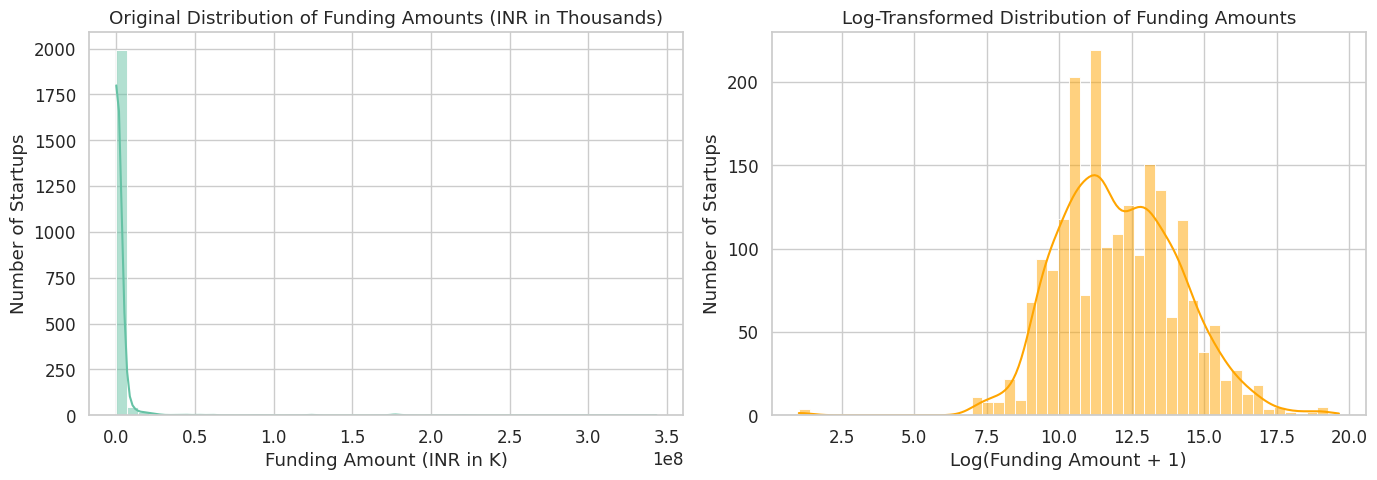

In [5]:
plt.figure(figsize=(14,5))

# Plot 1: Original distribution
plt.subplot(1,2,1)
sns.histplot(df['Amount in INR(K)'], bins=50, kde=True)
plt.title("Original Distribution of Funding Amounts (INR in Thousands)")
plt.xlabel("Funding Amount (INR in K)")
plt.ylabel("Number of Startups")

# Plot 2: Log-transformed distribution
plt.subplot(1,2,2)
sns.histplot(np.log1p(df['Amount in INR(K)']), bins=50, kde=True, color='orange')
plt.title("Log-Transformed Distribution of Funding Amounts")
plt.xlabel("Log(Funding Amount + 1)")
plt.ylabel("Number of Startups")

plt.tight_layout()
plt.show()


---

### **Visualization 1: Funding Amount Distribution Analysis**

#### 1. Original Distribution of Funding Amounts

The left plot shows the **raw distribution** of startup funding amounts (in INR thousands).

* The data is **heavily right-skewed**, indicating that most startups receive smaller funding amounts, while a few outliers secure exceptionally large investments.
* This kind of **long-tail distribution** is common in venture funding, where a minority of startups attract a disproportionate share of total capital.

#### 2. Log-Transformed Distribution

To better understand the spread, we applied a **logarithmic transformation** (`log(Funding Amount + 1)`), as shown in the right plot.

* The transformation **normalizes the scale**, revealing a near **bell-shaped curve**, suggesting that funding values approximately follow a **log-normal distribution**.
* This adjustment makes subsequent modeling and statistical analysis more robust, minimizing the influence of extreme outliers.

---

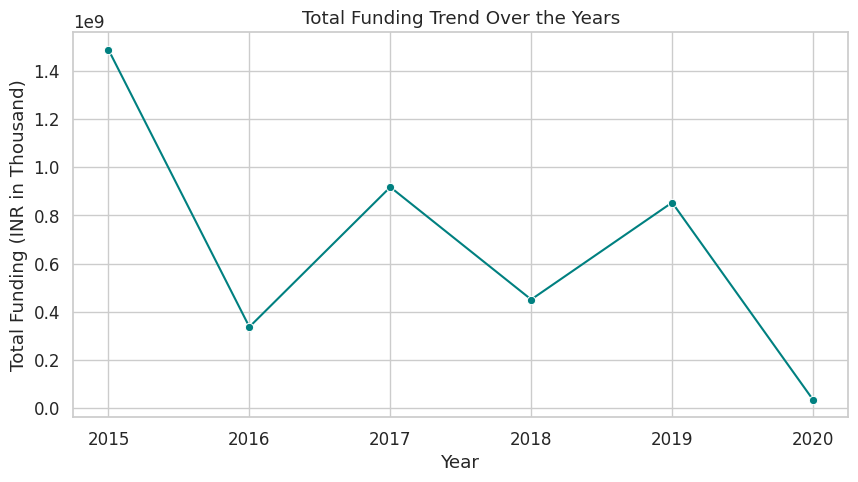

In [15]:
# Group by year and sum funding
funding_by_year = df.groupby('Year')['Amount in INR(K)'].sum().reset_index()

# Plot trend
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Amount in INR(K)', data=funding_by_year, marker='o', color='teal')
plt.title("Total Funding Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Funding (INR in Thousand)")
plt.show()

### **Visualization 2: Funding Trend Analysis**

 - The funding trend between 2015 and 2020 shows **significant volatility** due to the influence of both **global events** and **domestic policies**.
 Funding peaked in **2015** due to increased startup activity and government assistance (e.g. Startup India).

  - A market correction and heightened investor prudence are suggested by the steep **decline in 2016**.
  - Funding recovered in **2017** and **2019**, indicating periods of sectoral growth (e.g., fintech, edtech) and **renewed investor confidence**.
  - The **COVID-19 pandemic** began in 2020, coinciding with the **drastic drop in 2020**, which caused market disruptions and postponed investments.

  - These variations highlight how vulnerable startup funding is to **external shocks**, **investor behavior**, and **macroeconomic factors**.
  - Recognizing these trends aids in determining **strategic funding windows** and evaluating **ecosystem resilience** over time.

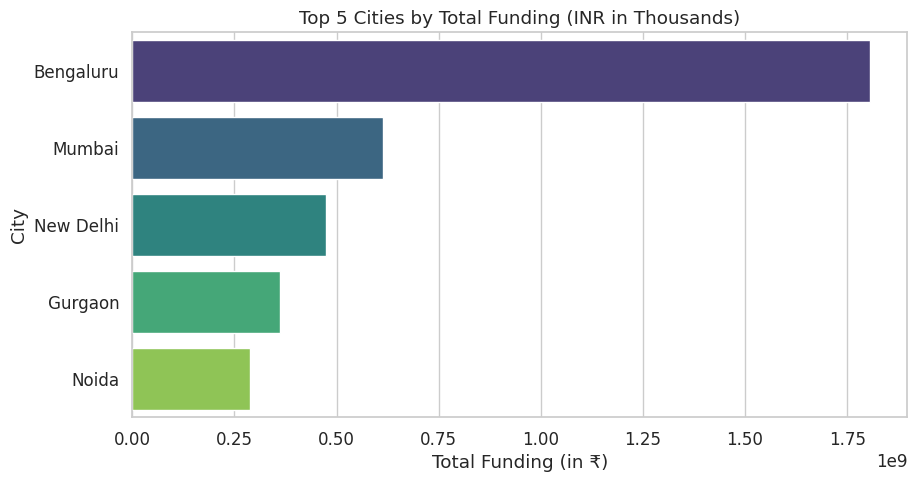

In [7]:
top_cities = df.groupby('City Location')['Amount in INR(K)'].sum().sort_values(ascending=False).head()

plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")
plt.title("Top 5 Cities by Total Funding (INR in Thousands)")
plt.xlabel("Total Funding (in ₹)")
plt.ylabel("City")
plt.show()


### **Visualization 3: Top 5 cities by Total Funding**

- **Bengaluru** leads by a wide margin, attracting the **highest total funding** (over ₹1.75 billion). Known as India's "Silicon Valley", it's a hub for tech startups and venture capital.
  
- **Mumbai** ranks second, with total funding crossing ₹600 million. As the financial capital, it has strong investor presence and a growing fintech ecosystem.

- **New Delhi** follows closely, reflecting its position as a center for government-related startups and growing innovation hubs.

- **Gurgaon** and **Noida**, both part of the NCR (National Capital Region), complete the top 5. They benefit from proximity to Delhi and house many tech and service-based startups.

- The **NCR region collectively (New Delhi, Gurgaon, Noida)** shows a strong startup presence, indicating regional consolidation of funding activity outside Bengaluru and Mumbai.

### Insight:

- There's a **clear geographical concentration** of startup funding in a few urban hubs, especially **Bengaluru**, which dominates the landscape.
- These cities provide better access to **talent, infrastructure, and investors**, making them attractive for entrepreneurs and VCs alike.

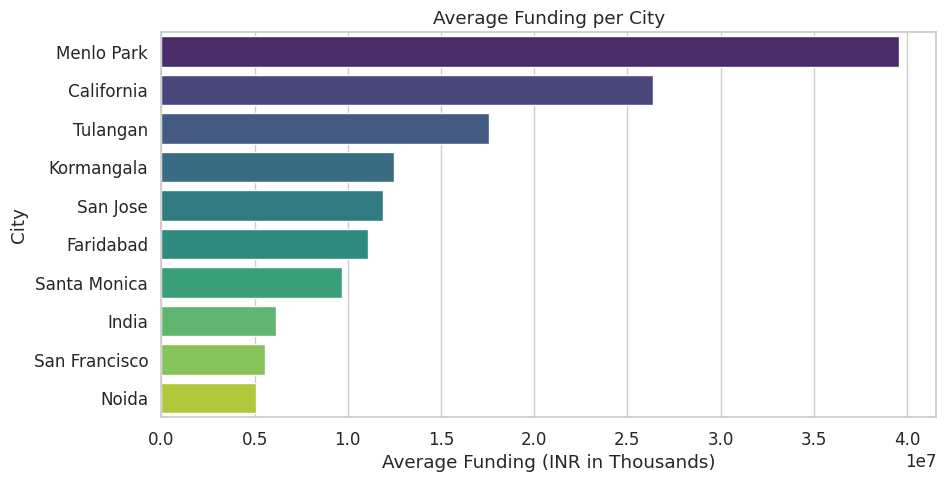

In [18]:
avg_funding_city = df.groupby('City Location')['Amount in INR(K)'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_funding_city.values, y=avg_funding_city.index, palette='viridis')
plt.title("Average Funding per City")
plt.xlabel("Average Funding (INR in Thousands)")
plt.ylabel("City")
plt.show()

### **Visualization 4: Average Funding Amount of Top 10 cities**

### Key Observation
  - The chart, featuring both US and Indian cities, reveals a **significant geographical disparity** in average funding amounts, with the highest-value investments concentrated in the US Silicon Valley region.
---
### Global Funding Tier Analysis

| Funding Tier (INR in Thousands) | Cities & Dominance | Key Insight |
| :--- | :--- | :--- |
| **Elite Tier** ($> 25,000,000$) | **Menlo Park** ($\approx 39.5\text{M}$), **California** ($\approx 26.5\text{M}$) | Clear US dominance, reflecting massive late-stage funding rounds characteristic of Silicon Valley. |
| **Strong Mid-Range** ($\approx 17,500,000$) | **Tulangan** ($\approx 17.5\text{M}$) | **Highest ranking Indian city**, securing deal sizes comparable to major global hubs. |
| **Consistent Mid-Range** ($\approx 11,000,000$ to $12,500,000$) | **Kormangala** ($\approx 12.5\text{M}$), **San Jose** ($\approx 11.5\text{M}$), **Faridabad** ($\approx 11.0\text{M}$) | Shows US (San Jose) and Indian cities (Kormangala/Faridabad) competing at a similar level for average deal size. |
| **Lower Tier** ($< 10,000,000$) | **San Francisco** ($\approx 5.5\text{M}$), **Noida** ($\approx 4.0\text{M}$) | Notable for the low average of major tech cities like San Francisco and Indian cities like Noida, suggesting a higher volume of smaller, earlier-stage deals. |
---
### Conclusion

 - The dataset is **highly skewed** by the large average funding in Menlo Park and California. The impressive standing of **Tulangan** (3rd overall) and **Kormangala** (4th overall) indicates that certain Indian cities are attracting large individual investments, despite others like Noida having lower averages.

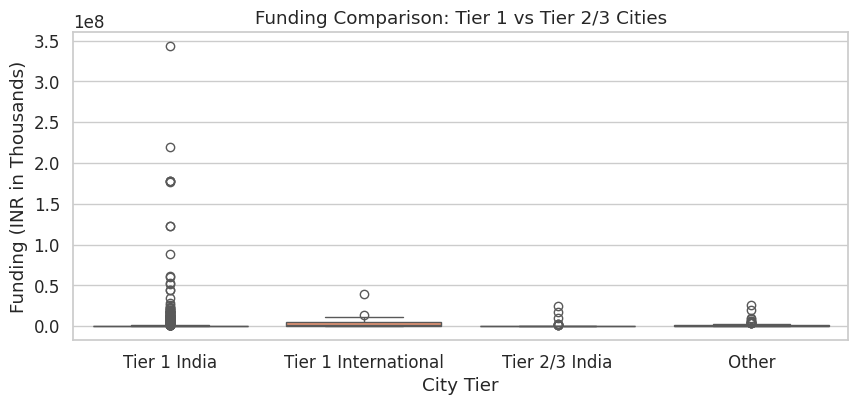

In [9]:
plt.figure(figsize=(10,4))
sns.boxplot(x='City Tier', y='Amount in INR(K)', data=df, palette='Set2')
plt.title("Funding Comparison: Tier 1 vs Tier 2/3 Cities")
plt.ylabel("Funding (INR in Thousands)")
plt.show()

### **Visualization 5: Startup Funding Comparison among different tier cities**

**Key Insights:**

 * With a wide range and a few extreme outliers (some exceeding ₹300M), **Tier 1 India** cities receives the **highest funding**, demonstrating strong investor focus on significant startup hubs.
 * Although less consistent, **Tier 1 International** cities also draws a sizable amount of funding.
 * The **Other** and **Tier 2/3 India** cities categories exhibit **much narrower spreads and much lower medians**, suggesting restricted access to large-scale funding.

 **Implication:**
 In India, Tier 1 cities continue to receive the majority of startup funding.  Potential in developing ecosystems could be unlocked by closing this gap.

 ---

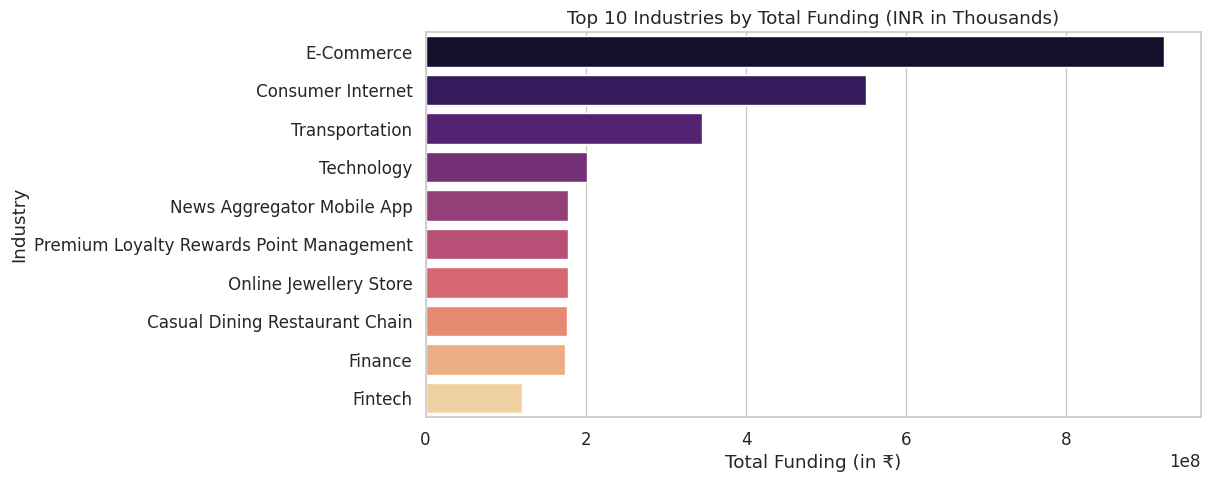

In [10]:
top_industries = df.groupby('Industry Vertical')['Amount in INR(K)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_industries.values, y=top_industries.index, palette="magma")
plt.title("Top 10 Industries by Total Funding (INR in Thousands)")
plt.xlabel("Total Funding (in ₹)")
plt.ylabel("Industry")
plt.show()


---

### **Visualization 6: Top 10 Industries by Total Funding**

The industries that have received the most funding are indicated in this horizontal bar chart.

**Key Insights:**

 * The funding landscape is dominated by **E-Commerce** and **Consumer Internet**, which together account for a sizable portion of all investments.
 *  Strong investor interest is also seen in sectors like **Transportation**, **Technology**, and **News Aggregator Apps**.
 *  The top 10 included niche industries like **Online Jewellery Stores** and **Casual Dining Chains**, which reflect a variety of funding trends outside of core tech sectors.

 * **Implication:**
 Scalable, digital-first industries are the focus of investors, and e-commerce is undoubtedly the most attractive sector for capital.

---


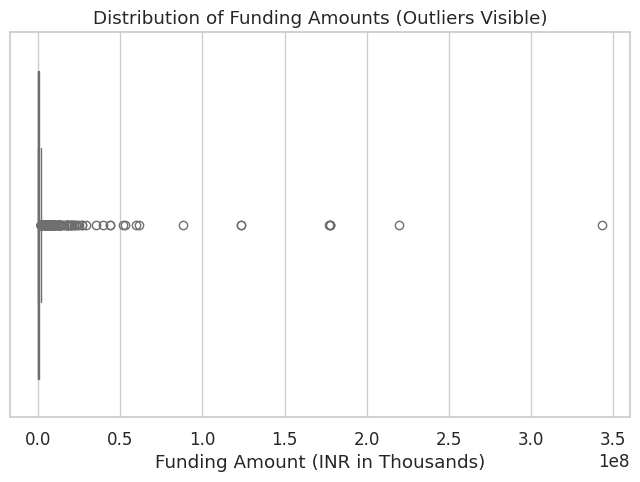

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Amount in INR(K)'], color='skyblue')
plt.title("Distribution of Funding Amounts (Outliers Visible)")
plt.xlabel("Funding Amount (INR in Thousands)")
plt.show()

---

### **Visualization 7: Distribution of Funding Amounts (Outliers Visible)**

This boxplot visualizes the distribution of startup funding amounts, including outliers.

**Key Insights:**

 * Most startups receive modest funding, as evidenced by the **majority of funding amounts being clustered at the lower end** with a steep drop-off.
 *  The distribution is greatly skewed by the **many high-value outliers**, some of which have values above ₹300 million.
 *  Extreme outliers indicate a **high variance** in funding, which is probably caused by a small number of well-funded startups.
* **Implication:**
While many startups receive small amounts of funding, a few raise disproportionately large rounds, raising the average. This creates a highly unequal funding landscape.
---

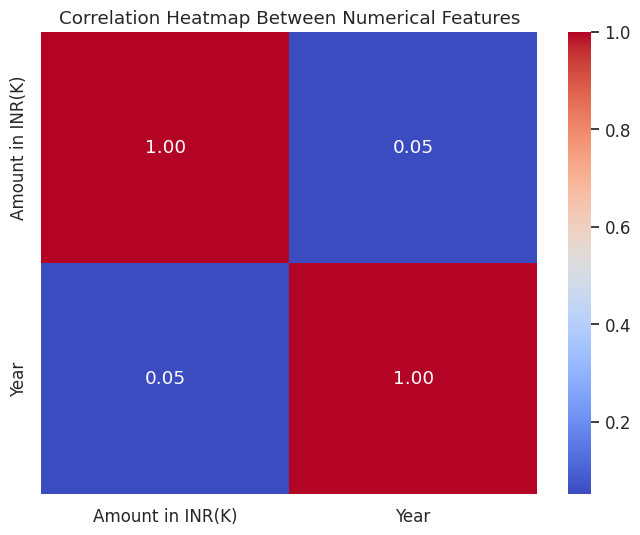

In [12]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=['Amount in USD(K)','Sr No'])

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap Between Numerical Features")
plt.show()


---

### **Visualization **8**: Correlation Heatmap Analysis**


The correlation heatmap provides insights into the linear relationships between the numerical features: **Year** and **Amount in INR(K)**.

* The **correlation coefficient** between *Year* and *Amount* is **0.05**, indicating a **very weak positive relationship** — essentially negligible.
* Both features are largely **independent**, suggesting that temporal trends (Year) do not significantly influence the monetary values (Amount in INR) in this dataset.

This analysis helps confirm that **no multicollinearity** exists between these numerical variables, allowing us to use them together in models without redundancy.

---


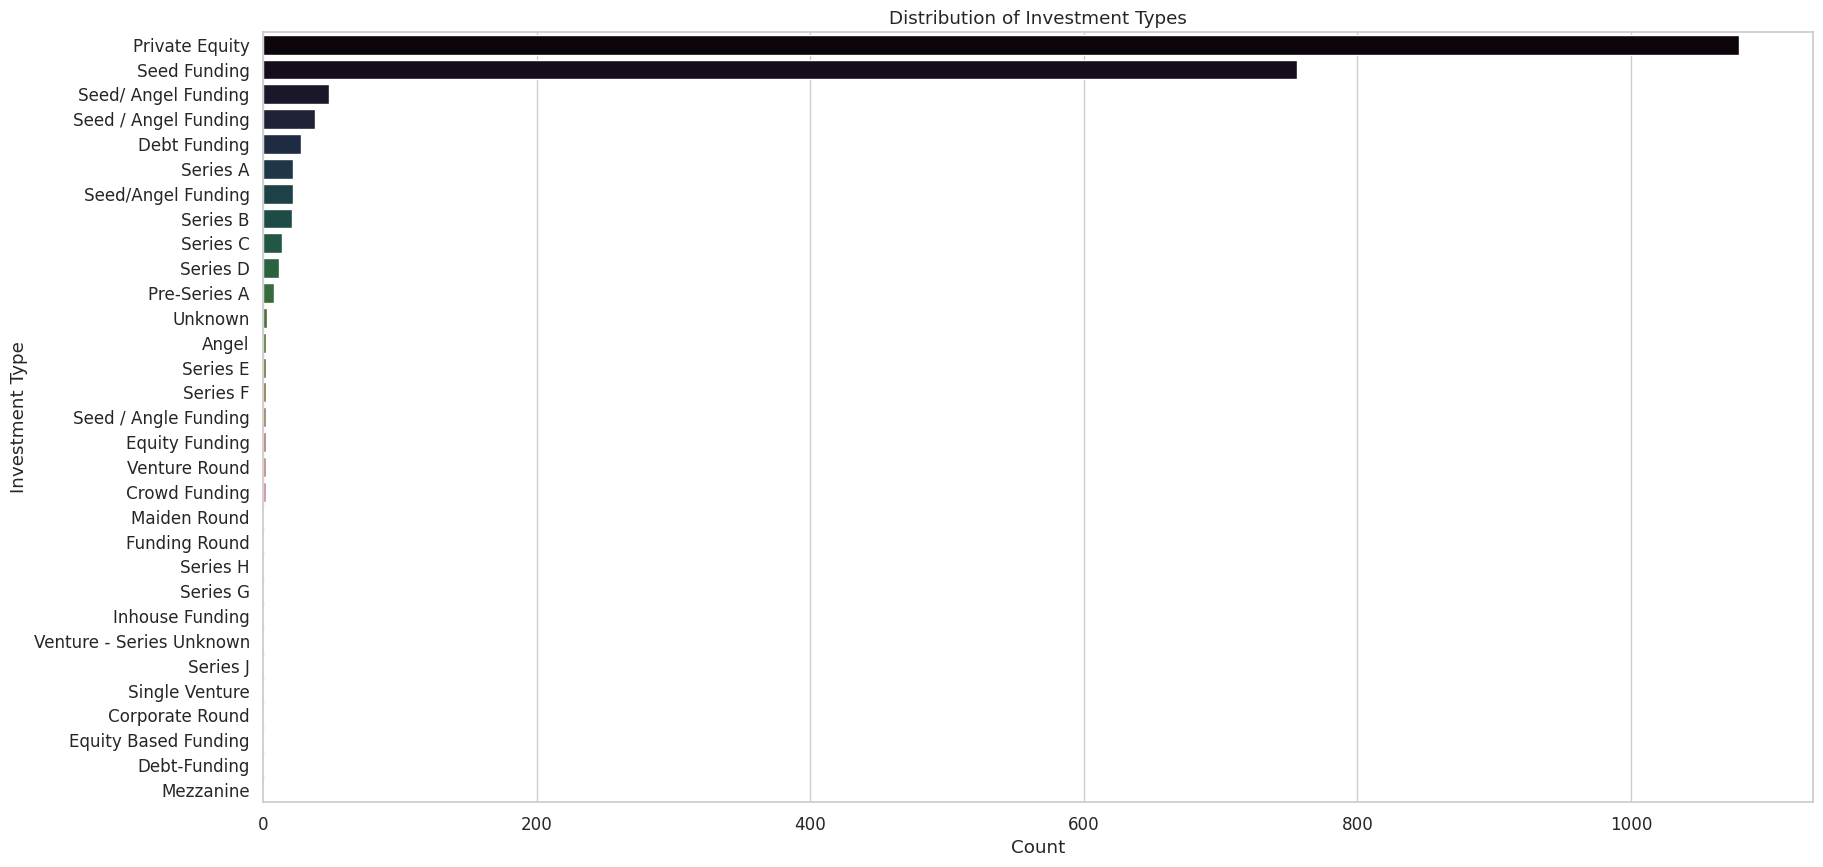

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(y='Investment Type', data=df, order=df['Investment Type'].value_counts().index, palette="cubehelix")
plt.title("Distribution of Investment Types")
plt.xlabel("Count")
plt.ylabel("Investment Type")
plt.show()

---
### **Visualization 9: Distribution of Investment Types**

This horizontal bar chart highlights the **dominant investment types** across the dataset:

* **Private Equity** and **Seed Funding** are the **most common** forms of investment, with Private Equity taking a clear lead.
* Other funding types such as **Debt Funding**, **Series A–D**, and various **Angel/Seed hybrids** appear far less frequently.
* A long tail of rare categories (like **Mezzanine**, **Series J**, and **Crowd Funding**) suggests **diverse but infrequent** funding mechanisms.

This skewed distribution indicates a **strong preference for early-stage and private equity funding**, possibly reflecting the investment landscape’s risk appetite and sector maturity.

---


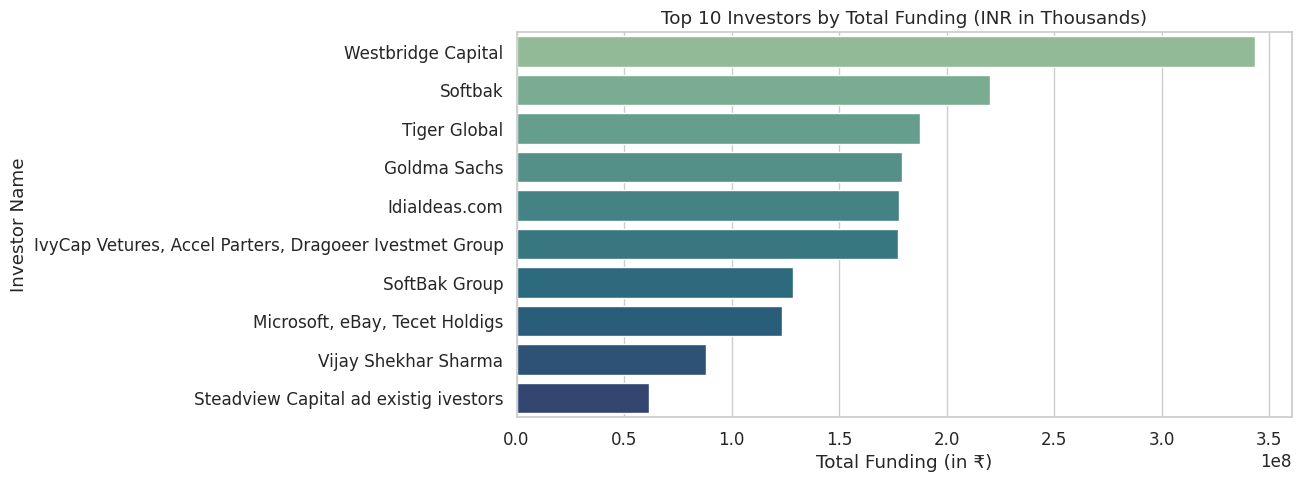

In [14]:
top_investors = df.groupby('Investors Name')['Amount in INR(K)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_investors.values, y=top_investors.index, palette="crest")
plt.title("Top 10 Investors by Total Funding (INR in Thousands)")
plt.xlabel("Total Funding (in ₹)")
plt.ylabel("Investor Name")
plt.show()


---

### **Visualization 10: Top 10 investors by total funding**

This chart presents the **top 10 investors** ranked by total funding amount (in INR thousands):

* **Westbridge Capital** clearly leads the pack, with the highest overall investment.
* Other major contributors include **Softbank**, **Tiger Global**, and **Goldman Sachs**.
* A mix of **institutional giants** and **consortiums** (e.g., Microsoft + eBay + others) highlight a **diverse investor landscape**.
* The inclusion of individuals like **Vijay Shekhar Sharma** signals that **high-net-worth individuals** also play a role in large funding rounds.

This visualization helps pinpoint the **most influential players** in terms of capital contribution — valuable insight for understanding investment dynamics in the ecosystem.

---